# Exercise on xarray

* [**Sign up to the JupyterHub**](https://www.phenocube.org/) to run this notebook interactively from your browser
* **Compatibility:** Notebook currently compatible with the Open Data Cube environments of the University of Wuerzburg

This is the exercise for using xarray library in the open data cube environment. In this exercise, you will practice how to collect Sentinel-2 data and perform basic ananlysis in Python. Our test area is in Munich.

## Set Up Environment

Let's first set up the environment on your own. You need to import libraries Numpy and matplotlib. Connect the environment to data cube.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

The following numpy arrays are provided for you.

In [24]:
ly1 = np.ones((300,300))
ly2 = np.random.rand(300,300)
ly3 = np.random.rand(300,300)

Please plot the third layer (ly3) as a 2D plot.

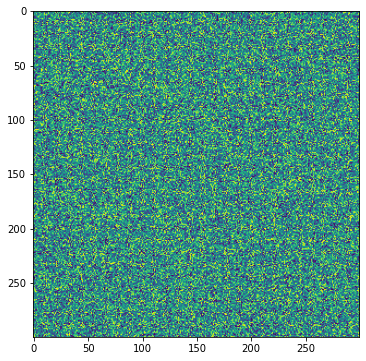

In [20]:
plt.figure(figsize=(6,6))
plt.imshow(ly3)

Please check the shape of the first layer (ly1).

In [12]:
ly1.shape

(300, 300)

Please put all payers into a stack. Check the shape of the stack when you are finished.

In [21]:
stack = np.dstack((ly1,ly2,ly3))
stack.shape

(300, 300, 3)

Let create a new numpy array. The values of this array are the sum of all layers. Plot this layer in a 2D plot.

In [25]:
ly_sum = ly1 + ly2 + ly3
ly_sum.shape

(300, 300)

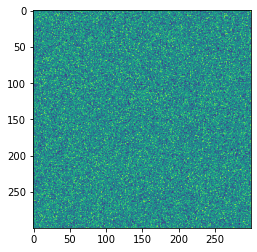

In [26]:
plt.imshow(ly_sum)

Calculate the mean, minimum, and maximum of the all the pixels in the sum layer.

In [32]:
np.mean(ly_sum)

2.0001831266664243

In [34]:
np.min(ly_sum)

1.0019982115990587

In [35]:
np.max(ly_sum)

2.998944369906283

Create a new binary array. The value of this array is defined by if the sum layer is larger than 2. For the pixels where sum layer is larger than 2, the pixels will be indicated by 1, otherwise it is indicated by 0. Plot the result.

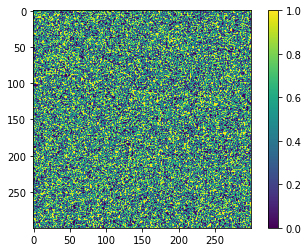

In [33]:
binary = np.zeros_like(ly_sum)
binary[ly_sum > 2] = 1

plt.imshow(binary)
plt.colorbar()

Create a new array just like the binary array. Then change the first 150 rows and columns to 2. Plot the result.

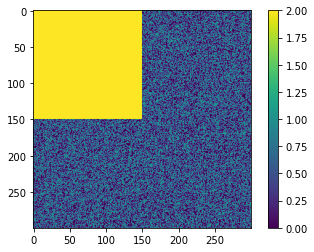

In [38]:
new = binary
new[0:150,0:150] = 2

plt.imshow(new)
plt.colorbar()

Use gaussian_filter() to filter the array above with sigma set to 1.

In [39]:
from scipy.ndimage import gaussian_filter

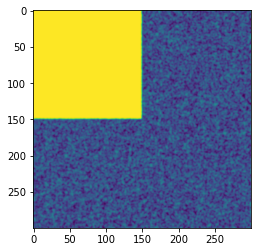

In [41]:
filtered = gaussian_filter(new, sigma=1)

plt.imshow(filtered)

Get the index (x and y) where the filtered array has values larger than 1.

In [47]:
i = np.where(filtered > 1)

x = i[0]
y = i[1]

In [48]:
print(x)
print(y)

[  0   0   0 ... 150 150 150]
[  0   1   2 ... 141 142 143]
